# Case Study Description

In this case study, we will be developing a credit risk model from scratch for the Acredius Crowdlending pillar. As a marketplace, businesses come to Acredius to ask for loans. These are registered companies. They apply for  a loan online. The loan application is a journey where the business precises the amount and duration of the  wished loan, uploads all the documents (balance sheets, marketing documents, etc), connects its social media  profiles if possible, and answers a couple of questions. Once the process is done, it receives an instant offer including the interest rate and monthly repayments. Acredius uses traditional and non-traditional data (directly collected from the applicant and/or through different APIs) to provide accurate pricing. Some portion of the applications is rejected. The ones accepted are classified into different risk classes.

# Descriptive Analysis

The first part of the case is understanding and describing the data sample. 
1. As the data is not clean, the first step will be to pre-process it. Which preprocessing techniques should be  used (for example, how to deal with missing values, etc)?
2. Using Python or R, write the code to clean the data.
3. Explore the data using different statistical techniques. What are the top 3 main highlights?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# modules we'll use
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read in all our data
nfl_data = pd.read_excel('/content/drive/My Drive/ATUCE_-_Data_Scientist_-_Case_study_data_2021_03.xlsx', sheet_name='Sheet1', na_values='-')
print(nfl_data.shape)
print(nfl_data.info())
print(nfl_data.describe())
# set seed for reproducibility
np.random.seed(0)

(688, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      688 non-null    int64  
 1   Pays                                    688 non-null    object 
 2   Taux                                    688 non-null    object 
 3   Mois                                    688 non-null    int64  
 4   Montant                                 688 non-null    object 
 5   Niveau de risque                        688 non-null    object 
 6   Emprunteur                              688 non-null    object 
 7   capital social                          684 non-null    object 
 8   année de création                       688 non-null    int64  
 9   Antériorité                             688 non-null    object 
 10  effectifs                               681 non-null

In [3]:
# look at the first five rows of the nfl_data file. 
# I can see a handful of missing data already!
nfl_data

,ID,Pays,Taux,Mois,Montant,Niveau de risque,Emprunteur,capital social,année de création,Antériorité,effectifs,Nombre de mois de la période 15,Nombre de mois de la période 16,Nombre de mois de la période 17,Nombre de mois de la période 18,Chiffre d'Affaires 15,Chiffre d'Affaires 16,Chiffre d'Affaires 17,Chiffre d'Affaires 18,Evolution du Chiffre d'Affaires 15,Evolution du Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 17,Evolution du Chiffre d'Affaires 18,EBE(retraité des loyers de leasing) 15,EBE(retraité des loyers de leasing) 16,EBE(retraité des loyers de leasing) 17,EBE(retraité des loyers de leasing) 18,Marge d'EBE 15,Marge d'EBE 16,Marge d'EBE 17,Marge d'EBE 18,Resultat Net 15,Resultat Net 16,Resultat Net 17,Resultat Net 18,Total Bilan 15,Total Bilan 16,Total Bilan 17,Total Bilan 18,BFRE 15,...,Fonds Propres 15,Fonds Propres 16,Fonds Propres 17,Fonds Propres 18,Fonds Propres / Total Bilan 15,Fonds Propres / Total Bilan 16,Fonds Propres / Total Bilan 17,Fonds Propres / Total Bilan 18,Passif circulant 15,Passif circulant 16,Passif circulant 17,Passif circulant 18,Actif immobilisé 15,Actif immobilisé 16,Actif immobilisé 17,Actif immobilisé 18,Actif circulant 15,Actif circulant 16,Actif circulant 17,Actif circulant 18,Dettes court terme 15,Dettes court terme 16,Dettes court terme 17,Dettes court terme 18,Dettes Moyen long terme 15,Dettes Moyen long terme 16,Dettes Moyen long terme 17,Dettes Moyen long terme 18,Dettes Nettes / EBE(* années) 15,Dettes Nettes / EBE(* années) 16,Dettes Nettes / EBE(* années) 17,Dettes Nettes / EBE(* années) 18,Dettes Nettes / Fonds propres 15,Dettes Nettes / Fonds propres 16,Dettes Nettes / Fonds propres 17,Dettes Nettes / Fonds propres 18,BFRE en nombre de jours de CA 15,BFRE en nombre de jours de CA 16,BFRE en nombre de jours de CA 17,BFRE en nombre de jours de CA 18
0,755334684,France,"5,85 %",48,1 100 000 €,B,Ets Provost Frères,3 058 500 €,1962,1991,11 à 50,NaN,12,12,12,NaN,16801,24894,35938,NaN,NaN,"48,17%","44,36%",NaN,0% - 5%,0% - 5%,0% - 5%,NaN,NaN,NaN,NaN,NaN,0 - 5 %,0 - 5 %,0 - 5 %,NaN,19756,23453,30332,NaN,...,NaN,8480,10413,11198,NaN,"42,92 %","44,4 %","36,92 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"12,74*","9,18*","4,26*",NaN,"125,88%","97,66%","66,94%",NaN,367,252,200.0
1,666598628,Espagne,"5,50 %",48,310 000 €,B+,INTERNATIONAL STUDIES SA,396 072 €,1985,1998,11 à 50,NaN,12,12,12,NaN,1579,1743,2270,NaN,NaN,"10,38%","30,22%",NaN,343,463,812,NaN,20% - 25%,25% - 30%,35% - 40%,NaN,0 % - 5 %,0 % - 5 %,10 % - 15 %,NaN,1940,2040,2070,NaN,...,NaN,751,770,1041,NaN,"38,70%","37,72%","50,28%",NaN,1114,909,827,NaN,1064,1087,1354,NaN,876,953,716,NaN,100,130,135,NaN,75,37,0,NaN,"0,47 *","0,32 *","0,11 *",NaN,"21,51%","19,20%","8,46%",NaN,NaN,NaN,NaN
2,528199436,Pays-Bas,"6,45 %",48,165 000 €,B,Docufiller Sales,900,2016,2016,1 à 10,NaN,12,12,12,NaN,514,707,758,NaN,NaN,"37,55%","7,21%",NaN,50% - 55%,45% - 50%,55% - 60%,NaN,NaN,NaN,NaN,NaN,10 - 15 %,10 - 15 %,0 - 5 %,NaN,549,630,631,NaN,...,NaN,10,52,155,NaN,"1,82 %","8,25 %","24,56 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,02*","-0,01*","0,47*",NaN,"2870,00%","-7,69%","135,48%",NaN,102,-19,71.0
3,353279184,France,0.06,60,2 000 000 €,B,E.B.P.,10 000 €,2016,2014,51 à 250,NaN,NaN,12,12,NaN,NaN,27756,33064,NaN,NaN,NaN,"19,12%",NaN,NaN,10% - 15%,10% - 15%,NaN,NaN,NaN,NaN,NaN,NaN,0 - 5 %,0 - 5 %,NaN,NaN,24366,27011,NaN,...,NaN,NaN,7410,7462,NaN,NaN,"30,41 %","27,63 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,34*","2,99*",NaN,NaN,"157,76%","156,74%",NaN,NaN,45,35.0
4,633690177,Italie,"4,90 %",36,100 000 €,B+,Deltagamma,10 000 €,2003,2003,NaN,NaN,12,12,12,NaN,790,626,743,NaN,NaN,"-20,82%","18,81%",NaN,56,13,52,NaN,5% - 10%,0% - 5%,5% - 10%,NaN,0% - 5%,0% - 5%,0% - 5%,NaN,420477,283,330,NaN,...,NaN,246,139,132,NaN,"58,62%","49,09%","40,01%",NaN,352,202,238,NaN,173,145,190,NaN,229,138,140,NaN,NaN,49,46,NaN,NaN

In [4]:
nfl_data = nfl_data.replace('nan', np.NaN)
nfl_data = nfl_data.replace('N/A', np.NaN)
nfl_data = nfl_data.replace('Na', np.NaN)
nfl_data = nfl_data.replace('--', np.NaN)

In [5]:
# Drop ID as it is unique identifier not useful for our model
nfl_data.drop(['ID', 'année de création',	'Antériorité',	'Nombre de mois de la période 16'], axis=1, inplace=True)

In [6]:
# The missing values arevthe less in period 16 among all other periods
df = nfl_data[['Pays', 'Mois', 'Taux', 'Montant', 'Niveau de risque',
       'capital social', 'effectifs', "Chiffre d'Affaires 16",
       "Evolution du Chiffre d'Affaires 16", 'EBE(retraité des loyers de leasing) 16',
       "Marge d'EBE 16", 'Resultat Net 16', 'Total Bilan 16', 'BFRE 16',
       'Capacité de remboursement (FCCR) 16', 'Fonds Propres 16',
       'Fonds Propres / Total Bilan 16', 'Passif circulant 16',
       'Actif immobilisé 16', 'Actif circulant 16', 'Dettes court terme 16',
       'Dettes Moyen long terme 16', 'Dettes Nettes / EBE(* années) 16',
       'Dettes Nettes / Fonds propres 16', 'BFRE en nombre de jours de CA 16']]

In [7]:
df

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
0,France,48,"5,85 %",1 100 000 €,B,3 058 500 €,11 à 50,16801,NaN,0% - 5%,NaN,0 - 5 %,19756,NaN,"0,52",8480,"42,92 %",NaN,NaN,NaN,NaN,NaN,"12,74*","125,88%",367
1,Espagne,48,"5,50 %",310 000 €,B+,396 072 €,11 à 50,1579,NaN,343,20% - 25%,0 % - 5 %,1940,NaN,"0,23",751,"38,70%",1114,1064,876,100,75,"0,47 *","21,51%",NaN
2,Pays-Bas,48,"6,45 %",165 000 €,B,900,1 à 10,514,NaN,50% - 55%,NaN,10 - 15 %,549,NaN,"8,94",10,"1,82 %",NaN,NaN,NaN,NaN,NaN,"1,02*","2870,00%",102
3,France,60,0.06,2 000 000 €,B,10 000 €,51 à 250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Italie,36,"4,90 %",100 000 €,B+,10 000 €,NaN,790,NaN,56,5% - 10%,0% - 5%,420477,-26,"43,57",246,"58,62%",352,173,229,NaN,NaN,"-0,99 *","-0,22",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Espagne,36,0.08,150 000 €,C,3 100 €,1 à 10,9 424,"246,72%",339,0 % - 5 %,0 % - 5 %,3 957,117,"2,79",246,"6,21%",3 686,154,3 803,117,1 225,"2,83*",3.9,NaN
684,Espagne,60,0.07,1 050 000 €,B,900 800 €,51 à 250,8 468,"6,59%",2 561,30 % - 40 %,5 % - 10 %,7 770,2 370,"1,57",2 778,0.36,2 052,3 349,4 422,807,6 542,"2,02*",1.86,NaN
685,Espagne,60,"9,50 %",210 000 €,C,129 215 €,1 à 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,Espagne,36,0.07,105 000 €,B,727 041 €,1 à 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

36.45348837209303


In [9]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0][:]

,Count,Percent
capital social,4,0.581395
effectifs,7,1.017442
Chiffre d'Affaires 16,204,29.651163
Evolution du Chiffre d'Affaires 16,321,46.656977
EBE(retraité des loyers de leasing) 16,209,30.377907
Marge d'EBE 16,509,73.982558
Resultat Net 16,212,30.813953
Total Bilan 16,209,30.377907
BFRE 16,484,70.348837
Capacité de remboursement (FCCR) 16,216,31.395349


In [10]:
data = df
def drop_nan_columns(data, ratio=1.0)->pd.DataFrame:
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)
  
data = drop_nan_columns(df, ratio=0.76)

0 columns dropped- []


In [11]:
#Drop the rows where all elements are missing.

data.dropna(how='all')
data.shape

(688, 25)

### Categorical Columns (Pays, Niveau de risque, effectifs)

In [12]:
catg_col = ['Pays', 'Niveau de risque',	'effectifs']
for col in catg_col:
  for i in range(688):
    data[col][i] = str(data[col][i])
    data[col][i] = data[col][i].replace(' ', '')
    data[col][i] = data[col][i].replace('\n', '')
    data[col][i] = data[col][i].replace(',', '')
    data[col][i] = data[col][i].replace('.', '')

In [13]:
data.dtypes

Pays                                      object
Mois                                       int64
Taux                                      object
Montant                                   object
Niveau de risque                          object
capital social                            object
effectifs                                 object
Chiffre d'Affaires 16                     object
Evolution du Chiffre d'Affaires 16        object
EBE(retraité des loyers de leasing) 16    object
Marge d'EBE 16                            object
Resultat Net 16                           object
Total Bilan 16                            object
BFRE 16                                   object
Capacité de remboursement (FCCR) 16       object
Fonds Propres 16                          object
Fonds Propres / Total Bilan 16            object
Passif circulant 16                       object
Actif immobilisé 16                       object
Actif circulant 16                        object
Dettes court terme 1

In [14]:
print(data.shape)
data.head()

(688, 25)


,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
0,France,48,"5,85 %",1 100 000 €,B,3 058 500 €,11à50,16801,NaN,0% - 5%,NaN,0 - 5 %,19756,NaN,"0,52",8480,"42,92 %",NaN,NaN,NaN,NaN,NaN,"12,74*","125,88%",367
1,Espagne,48,"5,50 %",310 000 €,B+,396 072 €,11à50,1579,NaN,343,20% - 25%,0 % - 5 %,1940,NaN,"0,23",751,"38,70%",1114,1064,876,100,75,"0,47 *","21,51%",NaN
2,Pays-Bas,48,"6,45 %",165 000 €,B,900,1à10,514,NaN,50% - 55%,NaN,10 - 15 %,549,NaN,"8,94",10,"1,82 %",NaN,NaN,NaN,NaN,NaN,"1,02*","2870,00%",102
3,France,60,0.06,2 000 000 €,B,10 000 €,51à250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Italie,36,"4,90 %",100 000 €,B+,10 000 €,nan,790,NaN,56,5% - 10%,0% - 5%,420477,-26,"43,57",246,"58,62%",352,173,229,NaN,NaN,"-0,99 *","-0,22",NaN


In [15]:
data.effectifs.value_counts()

11à50         267
1à10          262
51à250        101
251à1000       37
Plusde1000     13
nan             7
Plusde600       1
Name: effectifs, dtype: int64

In [16]:
data = data.replace('nan', np.NaN)
data = data.replace('N/A', np.NaN)

In [17]:
data['effectifs'] = data['effectifs'].fillna("11à50")

In [18]:
for col in catg_col:
  data[col] = pd.Categorical(data[col]).astype('category')
  #data[col] = data[col].cat.codes
  print(data[col].cat.categories)

Index(['Espagne', 'France', 'Italie', 'Pays-Bas'], dtype='object')
Index(['A', 'A+', 'B', 'B+', 'C'], dtype='object')
Index(['11à50', '1à10', '251à1000', '51à250', 'Plusde1000', 'Plusde600'], dtype='object')


In [19]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null2 = pd.DataFrame({'Count': data.isnull().sum(), 'Percent': 100*data.isnull().sum()/len(data)})

##printing columns with null count more than 0
df_null2[df_null2['Count'] > 0][:]

,Count,Percent
capital social,4,0.581395
Chiffre d'Affaires 16,204,29.651163
Evolution du Chiffre d'Affaires 16,321,46.656977
EBE(retraité des loyers de leasing) 16,209,30.377907
Marge d'EBE 16,509,73.982558
Resultat Net 16,212,30.813953
Total Bilan 16,209,30.377907
BFRE 16,484,70.348837
Capacité de remboursement (FCCR) 16,216,31.395349
Fonds Propres 16,214,31.104651


In [20]:
for col in catg_col:
  data[col] = pd.Categorical(data[col]).astype('category')
  data[col] = data[col].cat.codes
data

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
0,1,48,"5,85 %",1 100 000 €,2,3 058 500 €,0,16801,NaN,0% - 5%,NaN,0 - 5 %,19756,NaN,"0,52",8480,"42,92 %",NaN,NaN,NaN,NaN,NaN,"12,74*","125,88%",367
1,0,48,"5,50 %",310 000 €,3,396 072 €,0,1579,NaN,343,20% - 25%,0 % - 5 %,1940,NaN,"0,23",751,"38,70%",1114,1064,876,100,75,"0,47 *","21,51%",NaN
2,3,48,"6,45 %",165 000 €,2,900,1,514,NaN,50% - 55%,NaN,10 - 15 %,549,NaN,"8,94",10,"1,82 %",NaN,NaN,NaN,NaN,NaN,"1,02*","2870,00%",102
3,1,60,0.06,2 000 000 €,2,10 000 €,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,36,"4,90 %",100 000 €,3,10 000 €,0,790,NaN,56,5% - 10%,0% - 5%,420477,-26,"43,57",246,"58,62%",352,173,229,NaN,NaN,"-0,99 *","-0,22",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,36,0.08,150 000 €,4,3 100 €,1,9 424,"246,72%",339,0 % - 5 %,0 % - 5 %,3 957,117,"2,79",246,"6,21%",3 686,154,3 803,117,1 225,"2,83*",3.9,NaN
684,0,60,0.07,1 050 000 €,2,900 800 €,3,8 468,"6,59%",2 561,30 % - 40 %,5 % - 10 %,7 770,2 370,"1,57",2 778,0.36,2 052,3 349,4 422,807,6 542,"2,02*",1.86,NaN
685,0,60,"9,50 %",210 000 €,4,129 215 €,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,0,36,0.07,105 000 €,2,727 041 €,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numerical Columns

### Currency Columns (Montant, capital social)

In [21]:
curr_col = ['Montant', 'capital social']
for col in curr_col:
  for i in range(688):
    data[col][i] = str(data[col][i])
    data[col][i] = data[col][i].replace(' ', '')
    data[col][i] = data[col][i].replace('\n', '')
    if data[col][i].find('€') != -1:
      data[col][i] = data[col][i].replace('€', '')
    data[col][i] = pd.to_numeric(data[col][i], errors='coerce')
  data[col] = data[col].astype(float)
  print(data[col])

0      1100000.0
1       310000.0
2       165000.0
3      2000000.0
4       100000.0
         ...    
683     150000.0
684    1050000.0
685     210000.0
686     105000.0
687     310000.0
Name: Montant, Length: 688, dtype: float64
0      3058500.0
1       396072.0
2          900.0
3        10000.0
4        10000.0
         ...    
683       3100.0
684     900800.0
685     129215.0
686     727041.0
687     136500.0
Name: capital social, Length: 688, dtype: float64


In [22]:
data.dtypes

Pays                                         int8
Mois                                        int64
Taux                                       object
Montant                                   float64
Niveau de risque                             int8
capital social                            float64
effectifs                                    int8
Chiffre d'Affaires 16                      object
Evolution du Chiffre d'Affaires 16         object
EBE(retraité des loyers de leasing) 16     object
Marge d'EBE 16                             object
Resultat Net 16                            object
Total Bilan 16                             object
BFRE 16                                    object
Capacité de remboursement (FCCR) 16        object
Fonds Propres 16                           object
Fonds Propres / Total Bilan 16             object
Passif circulant 16                        object
Actif immobilisé 16                        object
Actif circulant 16                         object


In [23]:
data['capital social'] = data['capital social'].fillna(data['capital social'].mean())
data['Montant'] = data['Montant'].fillna(data['Montant'].mean())

In [24]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

Pays                                        0
Mois                                        0
Taux                                        0
Montant                                     0
Niveau de risque                            0
capital social                              0
effectifs                                   0
Chiffre d'Affaires 16                     204
Evolution du Chiffre d'Affaires 16        321
EBE(retraité des loyers de leasing) 16    209
Marge d'EBE 16                            509
Resultat Net 16                           212
Total Bilan 16                            209
BFRE 16                                   484
Capacité de remboursement (FCCR) 16       216
Fonds Propres 16                          214
Fonds Propres / Total Bilan 16            213
Passif circulant 16                       520
Actif immobilisé 16                       517
Actif circulant 16                        517
Dettes court terme 16                     522
Dettes Moyen long terme 16        

### Percentage Columns (Taux, Evolution du Chiffre d'Affaires 16, Fonds Propres / Total Bilan 16, Dettes Nettes / Fonds propres 16)

In [25]:
perc_col = ["Taux", "Evolution du Chiffre d'Affaires 16", "Fonds Propres / Total Bilan 16", "Dettes Nettes / Fonds propres 16"]
for col in perc_col:
  for i in range(688):
    data[col][i] = str(data[col][i])
    data[col][i] = data[col][i].replace(' ', '')
    data[col][i] = data[col][i].replace(',', '.')
    data[col][i] = data[col][i].replace('\n', '')
    data[col][i] = data[col][i].replace('*', '')
    if data[col][i].find('%') != -1:
      data[col][i] = data[col][i].replace('%', '')
      data[col][i] = pd.to_numeric(data[col][i])/100
  #data[col] = data[col].astype(float)
  print(data[col])

0      0.0585
1       0.055
2      0.0645
3        0.06
4       0.049
        ...  
683      0.08
684      0.07
685     0.095
686      0.07
687      0.09
Name: Taux, Length: 688, dtype: object
0         nan
1         nan
2         nan
3         nan
4         nan
        ...  
683    2.4672
684    0.0659
685       nan
686       nan
687       nan
Name: Evolution du Chiffre d'Affaires 16, Length: 688, dtype: object
0      0.4292
1       0.387
2      0.0182
3         nan
4      0.5862
        ...  
683    0.0621
684      0.36
685       nan
686       nan
687       nan
Name: Fonds Propres / Total Bilan 16, Length: 688, dtype: object
0      1.2588
1      0.2151
2        28.7
3         nan
4       -0.22
        ...  
683       3.9
684      1.86
685       nan
686       nan
687       nan
Name: Dettes Nettes / Fonds propres 16, Length: 688, dtype: object


In [26]:
data = data.replace('nan', np.NaN)
data = data.replace('N/A', np.NaN)
data = data.replace('Na', np.NaN)
data = data.replace('--', np.NaN)

In [27]:
data[140:150]

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
140,1,48,0.058,130000.0,2,40500.0,0,174101,1.8923,0% - 5%,NaN,0 - 5 %,2014,NaN,"1,76",1567,0.7781,NaN,NaN,NaN,NaN,NaN,"-0,89*",-0.2454,30
141,1,36,0.077,180000.0,4,10000.0,1,NaN,NaN,NaN,NaN,0 - 5 %,383,NaN,"3,65","-22,4",-0.0585,NaN,NaN,NaN,NaN,NaN,"-0,35*",0.8728,-66
142,1,60,0.0325,1700000.0,1,627776.0,2,22949,NaN,10% - 15%,NaN,"-3,78%",125426,NaN,"5,69",10314,0.0822,NaN,NaN,NaN,NaN,NaN,"-0,22*",-0.0928,8
143,3,24,0.07,103093.0,4,1.0,1,1477,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,1,36,0.059,156000.0,2,500000.0,3,1310,NaN,0% - 5%,NaN,0 - 5 %,7021,NaN,"1,62",678,0.0966,NaN,NaN,NaN,NaN,NaN,"0,38*",1.306,44
145,1,36,0.055,730000.0,2,15000.0,0,309,NaN,15% - 20%,NaN,"-16,25%",1033,NaN,"-3,14",-171,-0.1655,NaN,NaN,NaN,NaN,NaN,"-2,94*",-3.269,80
146,3,36,0.075,150000.0,4,150000.0,1,928,NaN,15% - 20%,NaN,0 - 5 %,309,NaN,"4,38",285,0.9223,NaN,NaN,NaN,NaN,NaN,"-0,27*",-0.0596,44
147,1,36,0.0655,90000.0,4,6000.0,1,15543,NaN,0% - 5%,NaN,5 - 10 %,208,NaN,"0,73",101,0.4856,NaN,NaN,NaN,NaN,NaN,"1,62*",0.8663,27
148,1,36,0.07,45000.0,4,80000.0,1,14089,0.2239,0% - 5%,NaN,"-15,95%",1046,NaN,"1,1",498,0.4761,NaN,NaN,NaN,NaN,NaN,"2,29*",0.8298,5
149,1,60,0.072,525000.0,4,1180000.0,0,879,NaN,20% - 25%,NaN,0 - 5 %,4855,NaN,"1,92",999,0.2058,NaN,NaN,NaN,NaN,NaN,"0,39*",0.2107,39


In [28]:
data['Taux'] = data['Taux'].astype(float)
data["Evolution du Chiffre d'Affaires 16"] = pd.to_numeric(data["Evolution du Chiffre d'Affaires 16"]).astype(float)
data['Fonds Propres / Total Bilan 16'] = data['Fonds Propres / Total Bilan 16'].astype(float)
data['Dettes Nettes / Fonds propres 16'] = data['Dettes Nettes / Fonds propres 16'].astype(float)

In [29]:
data['Taux'] = data['Taux'].fillna(data['Taux'].mean())
data["Evolution du Chiffre d'Affaires 16"] = data["Evolution du Chiffre d'Affaires 16"].fillna(data["Evolution du Chiffre d'Affaires 16"].mean())
data['Fonds Propres / Total Bilan 16'] = data['Fonds Propres / Total Bilan 16'].fillna(data['Fonds Propres / Total Bilan 16'].mean())
data['Dettes Nettes / Fonds propres 16'] = data['Dettes Nettes / Fonds propres 16'].fillna(data['Dettes Nettes / Fonds propres 16'].mean())

In [30]:
data.dtypes

Pays                                         int8
Mois                                        int64
Taux                                      float64
Montant                                   float64
Niveau de risque                             int8
capital social                            float64
effectifs                                    int8
Chiffre d'Affaires 16                      object
Evolution du Chiffre d'Affaires 16        float64
EBE(retraité des loyers de leasing) 16     object
Marge d'EBE 16                             object
Resultat Net 16                            object
Total Bilan 16                             object
BFRE 16                                    object
Capacité de remboursement (FCCR) 16        object
Fonds Propres 16                           object
Fonds Propres / Total Bilan 16            float64
Passif circulant 16                        object
Actif immobilisé 16                        object
Actif circulant 16                         object


In [31]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

Pays                                        0
Mois                                        0
Taux                                        0
Montant                                     0
Niveau de risque                            0
capital social                              0
effectifs                                   0
Chiffre d'Affaires 16                     204
Evolution du Chiffre d'Affaires 16          0
EBE(retraité des loyers de leasing) 16    209
Marge d'EBE 16                            509
Resultat Net 16                           212
Total Bilan 16                            209
BFRE 16                                   484
Capacité de remboursement (FCCR) 16       216
Fonds Propres 16                          214
Fonds Propres / Total Bilan 16              0
Passif circulant 16                       520
Actif immobilisé 16                       517
Actif circulant 16                        517
Dettes court terme 16                     522
Dettes Moyen long terme 16        

### Interval Columns (EBE(retraité des loyers de leasing) 16,	Marge d'EBE 16,	Resultat Net 16)

In [32]:
intrv_col = ["EBE(retraité des loyers de leasing) 16",	"Marge d'EBE 16"]

for col in intrv_col:
  for i in range(688):
    data[col][i] = str(data[col][i])
    data[col][i] = data[col][i].replace(' ', '')
    data[col][i] = data[col][i].replace('\n', '')
    data[col][i] = data[col][i].replace(',', '')
    if data[col][i].find('%') != -1:
      data[col][i] = data[col][i].replace('%', '')
      data[col][i] = data[col][i].split('-')
      data[col][i] = (float(data[col][i][0])/100 + float(data[col][i][1])/100)/2
    data[col][i] = pd.to_numeric(data[col][i], errors='coerce')
  data[col] = data[col].astype(float)
  #print(data[col])

for i in range(688):
  data['Resultat Net 16'][i] = str(data['Resultat Net 16'][i])
  data['Resultat Net 16'][i] = data['Resultat Net 16'][i].replace(' ', '')
  data['Resultat Net 16'][i] = data['Resultat Net 16'][i].replace(',', '.')
  data['Resultat Net 16'][i] = data['Resultat Net 16'][i].replace('\n', '')
  if data['Resultat Net 16'][i].find('%') != -1:
    data['Resultat Net 16'][i] = data['Resultat Net 16'][i].replace('%', '')
    if data['Resultat Net 16'][i][0] != '-' and data['Resultat Net 16'][i] != '0.0':
      data['Resultat Net 16'][i] = data['Resultat Net 16'][i].split('-')
      data['Resultat Net 16'][i] = (float(data['Resultat Net 16'][i][0])/100 + float(data['Resultat Net 16'][i][1])/100)/2
data['Resultat Net 16'] = data['Resultat Net 16'].astype(float)
#print(data['Resultat Net 16'])

In [33]:
data.dtypes

Pays                                         int8
Mois                                        int64
Taux                                      float64
Montant                                   float64
Niveau de risque                             int8
capital social                            float64
effectifs                                    int8
Chiffre d'Affaires 16                      object
Evolution du Chiffre d'Affaires 16        float64
EBE(retraité des loyers de leasing) 16    float64
Marge d'EBE 16                            float64
Resultat Net 16                           float64
Total Bilan 16                             object
BFRE 16                                    object
Capacité de remboursement (FCCR) 16        object
Fonds Propres 16                           object
Fonds Propres / Total Bilan 16            float64
Passif circulant 16                        object
Actif immobilisé 16                        object
Actif circulant 16                         object


In [34]:
data["EBE(retraité des loyers de leasing) 16"] = data["EBE(retraité des loyers de leasing) 16"].fillna(data["EBE(retraité des loyers de leasing) 16"].mean())
data["Marge d'EBE 16"] = data["Marge d'EBE 16"].fillna(data["Marge d'EBE 16"].mean())
data['Resultat Net 16'] = data['Resultat Net 16'].fillna(data['Resultat Net 16'].mean())

In [35]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

Pays                                        0
Mois                                        0
Taux                                        0
Montant                                     0
Niveau de risque                            0
capital social                              0
effectifs                                   0
Chiffre d'Affaires 16                     204
Evolution du Chiffre d'Affaires 16          0
EBE(retraité des loyers de leasing) 16      0
Marge d'EBE 16                              0
Resultat Net 16                             0
Total Bilan 16                            209
BFRE 16                                   484
Capacité de remboursement (FCCR) 16       216
Fonds Propres 16                          214
Fonds Propres / Total Bilan 16              0
Passif circulant 16                       520
Actif immobilisé 16                       517
Actif circulant 16                        517
Dettes court terme 16                     522
Dettes Moyen long terme 16        

### The Rest (Chiffre d'Affaires 16, Total Bilan 16,	BFRE 16,	Capacité de remboursement (FCCR) 16,	Fonds Propres 16, Passif circulant 16,	Actif immobilisé 16,	Actif circulant 16,	Dettes court terme 16,	Dettes Moyen long terme 16, Dettes Nettes / EBE(* années) 16,	BFRE en nombre de jours de CA 16)

In [36]:
for i in range(688):
    data['Dettes Nettes / EBE(* années) 16'][i] = str(data['Dettes Nettes / EBE(* années) 16'][i])
    data['Dettes Nettes / EBE(* années) 16'][i] = data['Dettes Nettes / EBE(* années) 16'][i].replace(' ', '')
    data['Dettes Nettes / EBE(* années) 16'][i] = data['Dettes Nettes / EBE(* années) 16'][i].replace(',', '.')
    data['Dettes Nettes / EBE(* années) 16'][i] = data['Dettes Nettes / EBE(* années) 16'][i].replace('%', '')
    if data['Dettes Nettes / EBE(* années) 16'][i].find('*') != -1:
      data['Dettes Nettes / EBE(* années) 16'][i] = data['Dettes Nettes / EBE(* années) 16'][i].replace('*', '')
data['Dettes Nettes / EBE(* années) 16'] = data['Dettes Nettes / EBE(* années) 16'].astype(float)
data["Dettes Nettes / EBE(* années) 16"] = data["Dettes Nettes / EBE(* années) 16"].fillna(data["Dettes Nettes / EBE(* années) 16"].mean())

In [37]:
rest_num = ["Chiffre d'Affaires 16", "Total Bilan 16", "BFRE 16", "Capacité de remboursement (FCCR) 16", "Fonds Propres 16", "Passif circulant 16", "Actif immobilisé 16", "Actif circulant 16", "Dettes court terme 16", "Dettes Moyen long terme 16", "BFRE en nombre de jours de CA 16"]
for col in rest_num:
  for i in range(688):
    data[col][i] = str(data[col][i])
    data[col][i] = data[col][i].replace(' ', '')
    data[col][i] = data[col][i].replace(',', '.')
    data[col][i] = pd.to_numeric(data[col][i], errors='coerce')
  data[col] = data[col].astype(float)
  data[col] = data[col].fillna(data[col].mean())

In [38]:
data.dtypes

Pays                                         int8
Mois                                        int64
Taux                                      float64
Montant                                   float64
Niveau de risque                             int8
capital social                            float64
effectifs                                    int8
Chiffre d'Affaires 16                     float64
Evolution du Chiffre d'Affaires 16        float64
EBE(retraité des loyers de leasing) 16    float64
Marge d'EBE 16                            float64
Resultat Net 16                           float64
Total Bilan 16                            float64
BFRE 16                                   float64
Capacité de remboursement (FCCR) 16       float64
Fonds Propres 16                          float64
Fonds Propres / Total Bilan 16            float64
Passif circulant 16                       float64
Actif immobilisé 16                       float64
Actif circulant 16                        float64


In [39]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

Pays                                      0
Mois                                      0
Taux                                      0
Montant                                   0
Niveau de risque                          0
capital social                            0
effectifs                                 0
Chiffre d'Affaires 16                     0
Evolution du Chiffre d'Affaires 16        0
EBE(retraité des loyers de leasing) 16    0
Marge d'EBE 16                            0
Resultat Net 16                           0
Total Bilan 16                            0
BFRE 16                                   0
Capacité de remboursement (FCCR) 16       0
Fonds Propres 16                          0
Fonds Propres / Total Bilan 16            0
Passif circulant 16                       0
Actif immobilisé 16                       0
Actif circulant 16                        0
Dettes court terme 16                     0
Dettes Moyen long terme 16                0
Dettes Nettes / EBE(* années) 16

In [40]:
data.describe()

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
count,688.000000,688.000000,688.000000,6.880000e+02,688.000000,6.880000e+02,688.000000,6.880000e+02,688.000000,6.880000e+02,688.000000,688.000000,6.880000e+02,6.880000e+02,688.000000,6.880000e+02,688.000000,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,688.000000,688.000000,688.000000
mean,1.152616,45.594477,0.061333,4.820967e+05,2.414244,1.334842e+07,1.011628,6.889143e+04,102.757565,5.840881e+03,0.133659,40.671622,1.730925e+05,8.516673e+03,21.519936,1.914161e+04,19.133584,1.311957e+05,9.864033e+04,2.035960e+05,2.350848e+04,7.546259e+04,-0.865855,0.467209,56.990325
std,0.670631,16.310660,0.013169,5.872168e+05,1.089142,1.456398e+08,1.110953,9.652423e+05,1410.129919,9.348400e+04,0.052490,610.002550,1.910076e+06,4.461093e+04,205.160989,2.530428e+05,264.095238,7.711621e+05,5.782733e+05,1.239909e+06,1.215344e+05,4.517271e+05,121.934406,5.649485,65.790421
min,0.000000,3.000000,0.025000,2.000000e+04,0.000000,1.000000e+00,0.000000,0.000000e+00,-0.792900,-4.100000e+01,-0.050000,-507.000000,-1.230000e+02,-1.451300e+04,-29.440000,-1.230000e+03,-3.368400,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,-2700.000000,-102.270000,-233.000000
25%,1.000000,36.000000,0.054000,1.000000e+05,2.000000,1.000000e+04,0.000000,1.317500e+03,0.073800,1.250000e-01,0.133659,0.025000,1.049000e+03,5.175500e+03,1.487500,2.730000e+02,0.223175,1.311957e+05,9.864033e+04,2.035960e+05,2.350848e+04,7.546259e+04,-0.865855,0.294100,56.990325
50%,1.000000,48.000000,0.060000,2.500000e+05,2.000000,8.000000e+04,1.000000,9.534000e+03,1.320850,2.035000e+02,0.133659,0.075000,1.018550e+04,8.516673e+03,3.795000,2.386000e+03,0.415000,1.311957e+05,9.864033e+04,2.035960e+05,2.350848e+04,7.546259e+04,0.135000,0.467209,56.990325
75%,1.000000,60.000000,0.070000,6.000000e+05,3.000000,6.277760e+05,1.000000,6.889143e+04,102.757565,5.840881e+03,0.133659,40.671622,1.730925e+05,8.516673e+03,21.519936,1.914161e+04,19.133584,1.311957e+05,9.864033e+04,2.035960e+05,2.350848e+04,7.546259e+04,1.912500,1.021000,56.990325
max,3.000000,84.000000,0.099000,3.600000e+06,4.000000,2.485450e+09,5.000000,2.532800e+07,37012.000000,2.453000e+06,0.475000,15694.000000,4.783400e+07,1.170000e+06,5122.730000,6.634000e+06,6789.000000,2.028200e+07,1.520700e+07,3.260500e+07,3.198000e+06,1.187900e+07,1682.000000,28.700000,685.000000


In [41]:
data

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,EBE(retraité des loyers de leasing) 16,Marge d'EBE 16,Resultat Net 16,Total Bilan 16,BFRE 16,Capacité de remboursement (FCCR) 16,Fonds Propres 16,Fonds Propres / Total Bilan 16,Passif circulant 16,Actif immobilisé 16,Actif circulant 16,Dettes court terme 16,Dettes Moyen long terme 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
0,1,48,0.0585,1100000.0,2,3058500.0,0,16801.000000,102.757565,0.025000,0.133659,0.025000,19756.000000,8516.673367,0.520000,8480.000000,0.429200,131195.748503,98640.331361,203595.978462,23508.478261,75462.594848,12.740000,1.258800,367.000000
1,0,48,0.0550,310000.0,3,396072.0,0,1579.000000,102.757565,343.000000,0.225000,0.025000,1940.000000,8516.673367,0.230000,751.000000,0.387000,1114.000000,1064.000000,876.000000,100.000000,75.000000,0.470000,0.215100,56.990325
2,3,48,0.0645,165000.0,2,900.0,1,514.000000,102.757565,0.525000,0.133659,0.125000,549.000000,8516.673367,8.940000,10.000000,0.018200,131195.748503,98640.331361,203595.978462,23508.478261,75462.594848,1.020000,28.700000,102.000000
3,1,60,0.0600,2000000.0,2,10000.0,3,68891.432573,102.757565,5840.881276,0.133659,40.671622,173092.468368,8516.673367,21.519936,19141.605085,19.133584,131195.748503,98640.331361,203595.978462,23508.478261,75462.594848,-0.865855,0.467209,56.990325
4,2,36,0.0490,100000.0,3,10000.0,0,790.000000,102.757565,56.000000,0.075000,0.025000,420477.000000,-26.000000,43.570000,246.000000,0.586200,352.000000,173.000000,229.000000,23508.478261,75462.594848,-0.990000,-0.220000,56.990325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,36,0.0800,150000.0,4,3100.0,1,9424.000000,2.467200,339.000000,0.025000,0.025000,3957.000000,117.000000,2.790000,246.000000,0.062100,3686.000000,154.000000,3803.000000,117.000000,1225.000000,2.830000,3.900000,56.990325
684,0,60,0.0700,1050000.0,2,900800.0,3,68891.432573,0.065900,2561.000000,0.350000,0.075000,7770.000000,2370.000000,1.570000,2778.000000,0.360000,2052.000000,98640.331361,203595.978462,23508.478261,6542.000000,2.020000,1.860000,56.990325
685,0,60,0.0950,210000.0,4,129215.0,1,68891.432573,102.757565,5840.881276,0.133659,40.671622,173092.468368,8516.673367,21.519936,19141.605085,19.133584,131195.748503,98640.331361,203595.978462,23508.478261,75462.594848,-0.865855,0.467209,56.990325
686,0,36,0.0700,105000.0,2,727041.0,1,68891.432573,102.757565,5840.881276,0.133659,40.671622,173092.468368,8516.673367,21.519936,19141.605085,19.133584,131195.748503,98640.331361,203595.978462,23508.478261,75462.594848,-0.865855,0.467209,56.990325


## Correlation Heatmap

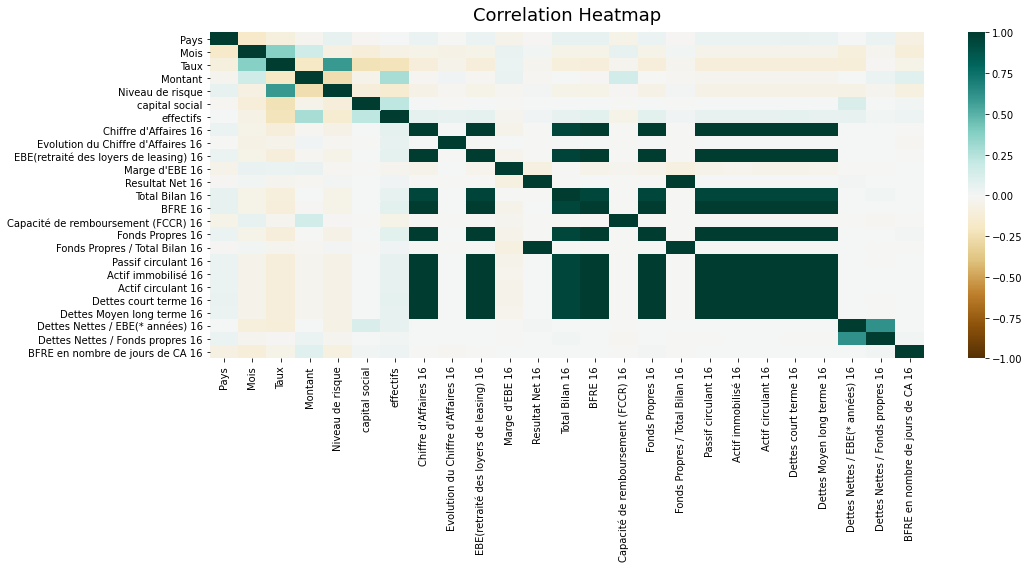

In [42]:
def correlation_heatmap(data):
  plt.figure(figsize=(16, 6))
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='BrBG')
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
  # save heatmap as .png file
  # dpi - sets the resolution of the saved image in dots/inches
  # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
  plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
  plt.show()
  return

correlation_heatmap(data)

From this plot we can see a few things:

Clearly there is a huge correlation (nearly one to one) with the Chiffre d'Affaires 16, EBE(retraité des loyers de leasing) 16, Total Bilan 16, BFRE 16, Fonds Propres 16, Passif circulant 16, Actif immobilisé 16, Actif circulant 16, Dettes court terme 16, Dettes Moyen long terme 16 (reasonable because they are calculated from the turnover). This suggests that we probably want to merge these columns as they add dimensionality but do not provide that much extra information.

From looking at the variables related to Taux the first observation is that some variables like Resultat Net 16 seem to have nearly no correlation. In general the most correlated variable seems to be Mois, we could plot these two variables against each other to get a clearer sense of their relationship.

In [43]:
dataframe = data
dataframe.drop(['Fonds Propres / Total Bilan 16', 'EBE(retraité des loyers de leasing) 16', 'Total Bilan 16', 'BFRE 16', 'Fonds Propres 16', 'Passif circulant 16', 'Actif immobilisé 16', 'Actif circulant 16', 'Dettes court terme 16', 'Dettes Moyen long terme 16'], axis=1, inplace=True)

In [44]:

dataframe.shape

(688, 15)

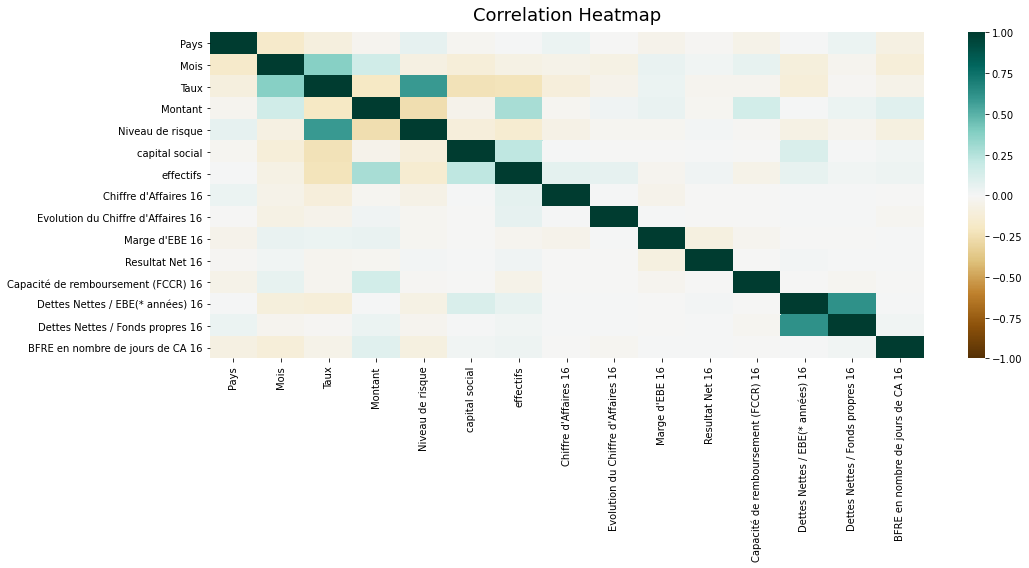

In [45]:
correlation_heatmap(dataframe)

## Distribution Plot

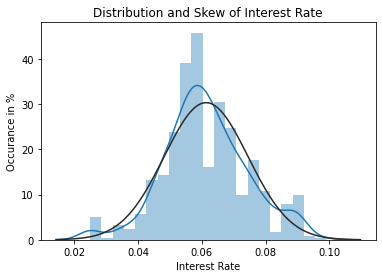

In [46]:
def distplot(data):
    """
    Reveals a positive skew
    """
    from scipy.stats import norm
    sns.distplot(data['Taux'], fit=norm)
    plt.title("Distribution and Skew of Interest Rate")
    plt.xlabel("Interest Rate")
    plt.ylabel("Occurance in %")
    plt.show()
    return

distplot(dataframe)

The extended tail forward gives a clear sign of a balance in our interest rate. This means that there are as much lower values as there are high values. Otherwise, possible solutions: we could apply include the square root and log functions.

## Lineplots

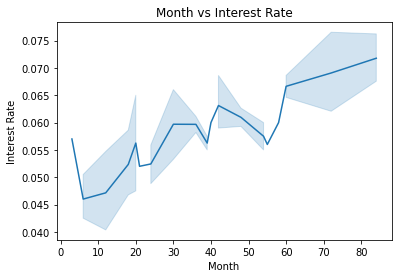

In [47]:
def lines(data):
    """
    Employment length vs interest rate
    """
    sns.lineplot(x=data['Mois'], y=data['Taux'])
    plt.title("Month vs Interest Rate")
    plt.xlabel("Month")
    plt.ylabel("Interest Rate")
    plt.show()
    return

lines(dataframe)

It seems interest rate vs month shows some non-linear relation with a clear increase interest rate from 2 months to 84 months (7 years), probably because fast repayment is a sign of lower risk.

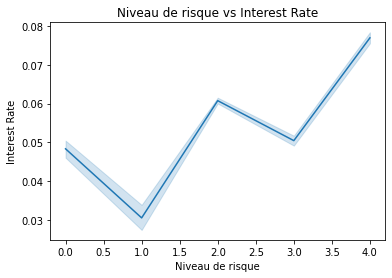

In [48]:
def lines2(data):
    """
    Employment length vs interest rate
    """
    sns.lineplot(x=data['Niveau de risque'], y=data['Taux'])
    plt.title("Niveau de risque vs Interest Rate")
    plt.xlabel("Niveau de risque")
    plt.ylabel("Interest Rate")
    plt.show()
    return

lines2(dataframe)

## Bubble Chart

In [49]:
dataframe.columns

Index(['Pays', 'Mois', 'Taux', 'Montant', 'Niveau de risque', 'capital social',
       'effectifs', 'Chiffre d'Affaires 16',
       'Evolution du Chiffre d'Affaires 16', 'Marge d'EBE 16',
       'Resultat Net 16', 'Capacité de remboursement (FCCR) 16',
       'Dettes Nettes / EBE(* années) 16', 'Dettes Nettes / Fonds propres 16',
       'BFRE en nombre de jours de CA 16'],
      dtype='object')

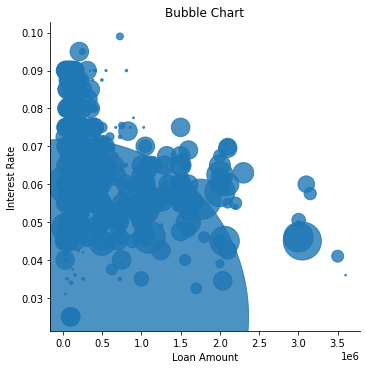

In [50]:
# Bubble Chart
def bubble_chart(data):
    info = data
    sns.lmplot(x="Montant", y="Taux",data=info, fit_reg=False, scatter_kws={"s": info["Chiffre d'Affaires 16"]*0.005})
    plt.title("Bubble Chart")
    plt.xlabel("Loan Amount")
    plt.ylabel("Interest Rate")
    plt.show()
    return

bubble_chart(dataframe)

In [51]:
dataframe

,Pays,Mois,Taux,Montant,Niveau de risque,capital social,effectifs,Chiffre d'Affaires 16,Evolution du Chiffre d'Affaires 16,Marge d'EBE 16,Resultat Net 16,Capacité de remboursement (FCCR) 16,Dettes Nettes / EBE(* années) 16,Dettes Nettes / Fonds propres 16,BFRE en nombre de jours de CA 16
0,1,48,0.0585,1100000.0,2,3058500.0,0,16801.000000,102.757565,0.133659,0.025000,0.520000,12.740000,1.258800,367.000000
1,0,48,0.0550,310000.0,3,396072.0,0,1579.000000,102.757565,0.225000,0.025000,0.230000,0.470000,0.215100,56.990325
2,3,48,0.0645,165000.0,2,900.0,1,514.000000,102.757565,0.133659,0.125000,8.940000,1.020000,28.700000,102.000000
3,1,60,0.0600,2000000.0,2,10000.0,3,68891.432573,102.757565,0.133659,40.671622,21.519936,-0.865855,0.467209,56.990325
4,2,36,0.0490,100000.0,3,10000.0,0,790.000000,102.757565,0.075000,0.025000,43.570000,-0.990000,-0.220000,56.990325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,36,0.0800,150000.0,4,3100.0,1,9424.000000,2.467200,0.025000,0.025000,2.790000,2.830000,3.900000,56.990325
684,0,60,0.0700,1050000.0,2,900800.0,3,68891.432573,0.065900,0.350000,0.075000,1.570000,2.020000,1.860000,56.990325
685,0,60,0.0950,210000.0,4,129215.0,1,68891.432573,102.757565,0.133659,40.671622,21.519936,-0.865855,0.467209,56.990325
686,0,36,0.0700,105000.0,2,727041.0,1,68891.432573,102.757565,0.133659,40.671622,21.519936,-0.865855,0.467209,56.990325


# Modeling

Build a model that predicts the interest rate of the loan, based on a selected set of variables. Please describe the step-by-step approach you used. Expected output: A recommendation on the best model to use.

In [52]:
dataset = dataframe
def load_split_data(data, column='Taux', test_size=0.2):
    from sklearn.model_selection import train_test_split
    target = data[column]
    data.drop(column, axis=1, inplace=True)
    return train_test_split(data, target, test_size=test_size)
X_train, X_test, y_train, y_test = load_split_data(dataset)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(550, 14) (138, 14) (550,) (138,)


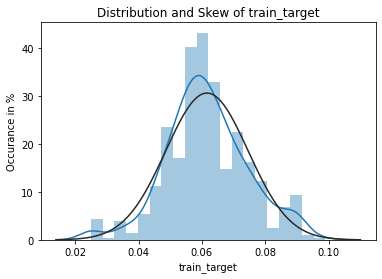

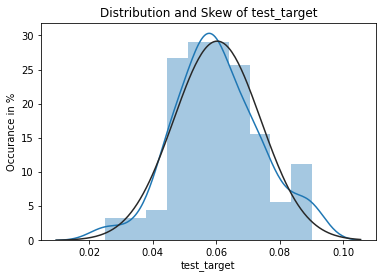

In [53]:
def distplot_train(data):
    """
    Reveals a positive skew
    """
    from scipy.stats import norm
    sns.distplot(y_train, fit=norm)
    plt.title("Distribution and Skew of train_target")
    plt.xlabel("train_target")
    plt.ylabel("Occurance in %")
    plt.show()
    return

def distplot_test(data):
    """
    Reveals a positive skew
    """
    from scipy.stats import norm
    sns.distplot(y_test, fit=norm)
    plt.title("Distribution and Skew of test_target")
    plt.xlabel("test_target")
    plt.ylabel("Occurance in %")
    plt.show()
    return

distplot_train(dataframe)
distplot_test(dataframe)

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

# instantiate linear regression object
LR = LinearRegression()

# fit or train the linear regression model on the training set and store parameters
LR.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#LR.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = LR.predict(X_train)

ridge_test_pred = LR.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.008296985623664759


## Ridge Regression

In [55]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

# instantiate linear regression object
ridge = RidgeCV(cv=10)

# fit or train the linear regression model on the training set and store parameters
ridge.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
ridge.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = ridge.predict(X_train)

ridge_test_pred = ridge.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.008313394496155624


## Lasso

In [56]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# instantiate linear regression object
lasso = Lasso(alpha =0.0005)

# fit or train the linear regression model on the training set and store parameters
lasso.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#lasso.alpha_

# show the coefficients of each variable
# lasso.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = lasso.predict(X_train)

ridge_test_pred = lasso.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.008382917808124321


## ElasticNet

In [57]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error

# instantiate linear regression object
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9)

# fit or train the linear regression model on the training set and store parameters
ENet.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#ENet.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = ENet.predict(X_train)

ridge_test_pred = ENet.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.008370329687836435


## Kernel Ridge

In [58]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# instantiate linear regression object
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# fit or train the linear regression model on the training set and store parameters
KRR.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#ENet.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = KRR.predict(X_train)

ridge_test_pred = KRR.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.059333957139476985


An RMSE of 0.008 doesn't seem to be bad, especially for a general linear regression model using that only uses ridge regression to account for potential multicollineararity between features. Also, this linear model is pretty fast in computation time and seemingly straightforward in deploying and maintaing within production. However, without having RMSE's of other models to compare it to, it is difficult to understand the true value of or whether or not this model is "good" or even "fair". So we will try another machine learning technique to compare the models RMSE scores.

The RidgeCV regression model (with 10-fold cv technique used to optimize alpha parameter) produced an RMSE of 0.0090 when predicting on the training data. This RMSE implies that the root average of the model's squared residual errors in prediction is roughly the equivalent of plus or minus 0.90 of the the true value of the interest rate, since the interest rate was scaled down during preprocessing (divided by 100).

## Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# instantiate linear regression object
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15, min_samples_split=10,loss='huber')

# fit or train the linear regression model on the training set and store parameters
GBoost.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#LR.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = GBoost.predict(X_train)

ridge_test_pred = GBoost.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.0018873944893880077


## Light Gradient Boosting

In [60]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# fit or train the linear regression model on the training set and store parameters
model_lgb.fit(X_train, y_train)

# show the alpha parameter used in final ridgeCV model
#LR.alpha_

# show the coefficients of each variable
# ridge.coef_

# use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = model_lgb.predict(X_train)

ridge_test_pred = model_lgb.predict(X_test)

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_train, train_pred)))

RMSE on training data:  0.0036905068445865284


## Extreme Gradient Boosting

In [61]:
import xgboost as xgb
from xgboost import plot_importance

In [62]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[02:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.396178
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.356811
[2]	Test-rmse:0.321379
[3]	Test-rmse:0.28949
[4]	Test-rmse:0.260791
[5]	Test-rmse:0.234964
[6]	Test-rmse:0.211723
[7]	Test-rmse:0.190812
[8]	Test-rmse:0.171906
[9]	Test-rmse:0.154892
[10]	Test-rmse:0.139582
[11]	Test-rmse:0.125806
[12]	Test-rmse:0.113412
[13]	Test-rmse:0.102265
[14]	Test-rmse:0.092271
[15]	Test-rmse:0.083281
[16]	Test-rmse:0.075157
[17]	Test-rmse:0.067882
[18]	Test-rmse:0.061309
[19]	Test-rmse:0.055421
[20]	Test-rmse:0.050134
[21]	Test-rmse:0.045382
[22]	Test-rmse:0.041045
[23]	Test-rmse:0.037217
[24]	Test-rmse:0.033732
[25]	Test-rmse:0.03062
[26]	Test-rmse:0.027852
[27]	Test-rmse:0.025327
[28]	Test-rmse:0.023059
[29]	Test-rmse:0.021029
[30]	Test-rmse:0.019246
[31]	Test-rmse:0.01768
[32]	Test-rmse:0.01625
[33]	Test-rmse:0.014997
[34]	Test-rmse

In [63]:
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), y_train)))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))

RMSE of XGB model on training data:  0.001748659765980495


The RMSE of the XGB model on the training data was roughly 0.00175. This is lower than the ridge regression model's RMSE, but does come at the cost of computational time for training and predicting ==> XGB is the best model to use.

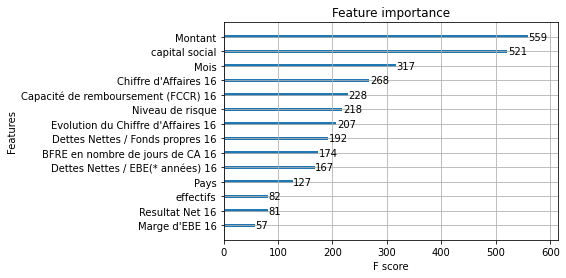

In [64]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

Interestingly, it looks like the Montant and capital social are the most important features in predicting Taux with the Mois and Chiffre d'Affaires 16 coming in at the third and forth most important. The Marge d'EBE 16 is the least important features.

In [65]:
from google.colab import files

# write out csv for each model's test predictions
linear_test_pred = pd.DataFrame(ridge_test_pred, columns=['RidgePredictions'])

XGB_test_pred = pd.DataFrame(GBDT_test_pred, columns=['XGBPredictions'])

test_predictions = pd.concat([linear_test_pred, XGB_test_pred], axis=1)

test_predictions.to_csv("test_predictions.csv")

#files.download('test_predictions.csv')

test_predictions

,RidgePredictions,XGBPredictions
0,0.062170,0.058685
1,0.057340,0.058954
2,0.049488,0.051656
3,0.060121,0.057919
4,0.045009,0.055101
...,...,...
133,0.050157,0.050844
134,0.051127,0.051792
135,0.051085,0.051867
136,0.066519,0.068336


# Alternative Data

The aim of this part is to collect alternative data (like social media profiles, industry specific information, etc.) in order to improve the model you created in part 2.

## 1. How can we improve the previous predictive model? Is getting alternative data, a solution for that?

We can improve the previous predictive model by adding More Data and more Features. Adding new features increases model flexibility and decreases bias(on the expense of variance).

In credit granting, Alternative Data generally refers to any data that is not directly related to a consumer’s credit behavior. Traditional data usually means data from a credit bureau, a credit application or a lender’s own files on an existing customer. Alternative data is everything else.

Yes, using alternative data gets additional features that can lead to increased performance. Alternative data represents datasets collected from non-traditional sources. These non-traditional sources include social media data, private company data, credit card data, supply chain data, web traffic, search trends, bank loan & credit data, point-of-sale data, satellite imagery, weather, and similar non-traditional data sources.

## 2. What is the meaning of generative data? Is it useful in our case? Why?



A generative model can generate new data instances, it includes the distribution of the data itself, and tells us how likely a given example is.

In our case, the model predicts the interest rate of the loan based on historical data. The generative model is not really useful because it must assign a probability to a sequence of rates. So, in order to generate data, we need to have a time series dataset.

## 3. What are the data sources we can add to our dataset to have better a predictive model? List some sources & techniques.

First, we can rely on open source datasets. There are mountains of credit risk data for machine learning around and some companies like Google are ready to give it away (Kaggle: the world’s biggest online data science community): https://www.kaggle.com/imsparsh/lending-club-loan-dataset-2007-2011 , https://www.kaggle.com/husainsb/lendingclub-issued-loans ...

Second, Alternative data sources consisted of credit card transactions, web scraped data, geolocation data from cell phones, satellite images and weather forecasts. Web scraping refers to the extraction of data from web pages, arguably the single biggest source of raw and unstructured data available.

FICO Blog: https://www.fico.com/blogs/using-alternative-data-credit-risk-modelling

A few sources of alternative data, and how useful they are for credit decisions.

Social Profile Data: Mining Facebook, LinkedIn, Twitter, Instagram, Snapchat or other social media sites

Clickstream Data: How a customer moves through your website, where they click and how long they take on a page can be predictive.

Survey / Questionnaire Data: An innovative new way of rating the credit risk of someone with little or no credit history is through psychometrics.

## 4. Adjust the model using the new data. What are the results? What are your conclusions?

In [71]:
new_data = pd.read_csv('/content/drive/My Drive/loan.csv')
#new_data = new_data[['loan_amnt',	'funded_amnt',	'funded_amnt_inv',	'term',	'int_rate',	'installment',	'grade']]
new_data

#or scrap from Twitter

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-

Add either new features or more rows to the original dataset, preprocess it (time limit) and try our XGB model ==> The performance becomes better. So, Alternative Data is a revolutionary concept especially in the credit risk field (FICO example in America: credit scoring card for different persons).

**Abir Ben Haj Youssef**

Data Science Engineer, ENSI

Email: abir.belhajyoussef@ensi-uma.tn

Phone: +216 93 189 062

Linkedin: https://www.linkedin.com/in/abir-b/

Github: https://github.com/abirbhy